# Speed Dating Data Analysis

## Import libraries and dataset

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

import plotly.express as px
import plotly.graph_objects as go


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("Speed_Dating_Data.csv", encoding='unicode_escape')

df = df.iloc[:,:-1] # remove last column
df.drop(df[df.iloc[:,49] == " Research"].index, inplace=True) # These rows should be numbers (source od the DtypeWarning)
df.drop(df[df.iloc[:,49] == " Human Rights Director"].index, inplace=True) # idem

/tmp/ipykernel_788/2910409666.py:1: DtypeWarning: Columns (49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Speed_Dating_Data.csv", encoding='unicode_escape')


## Description of the Dataset


In [3]:
print(df.info())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Index: 8349 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(176), int64(13), object(6)
memory usage: 12.5+ MB
None
iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object


We can se that the data tinder gathered is rather big : 8349 rows and 195 columns

In addition, we notice that categorical data such as gender is coded as numbers (int64) as indicated in the Data Key document

### Missing data


In [4]:
data = []
for col in df.columns:
        nas = df[col].isnull().value_counts()
        if True in nas.index:
            nas_percent = nas[1]/df.shape[0]*100
            data.append([col,round(nas_percent,2)])
        else:
            data.append([col,0])


missing_data = pd.DataFrame(data)
missing_data.columns = ['variable_name', 'percent_missing_data']
print(missing_data.describe())

       percent_missing_data
count            195.000000
mean              18.167795
std               18.026516
min                0.000000
25%                1.070000
50%               10.960000
75%               35.260000
max               48.930000


As seen here, there is quite a lot of missing data ! In average 18% missing data which is quite a lot. However participants were asked to answer many questions several times during and after the event which may explain why all were not answered. 

### Variables

Several variables are notes from 1 to 10 for several attributes. This kind of data is qualitative and ordinal (e.g. attr).

However, for other attributes the chosen scale was a point allocation for a total sum of 100 points (attr1_1) which is closer to a discrete continous variable.

This differnece of scale has to be kept in mind for adequate comparisons. 

We can for example bring the 1-10 scale to a 100 scale  with a simple calculation, which is what was done for most attribute notes.

In [5]:
print(df[['attr','attr1_1']].describe())

              attr      attr1_1
count  8147.000000  8270.000000
mean      6.187971    22.537597
std       1.950344    12.603602
min       0.000000     0.000000
25%       5.000000    15.000000
50%       6.000000    20.000000
75%       8.000000    25.000000
max      10.000000   100.000000


We can visualize the age distribution of participants.

count    8254.000000
mean       26.360310
std         3.572456
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64


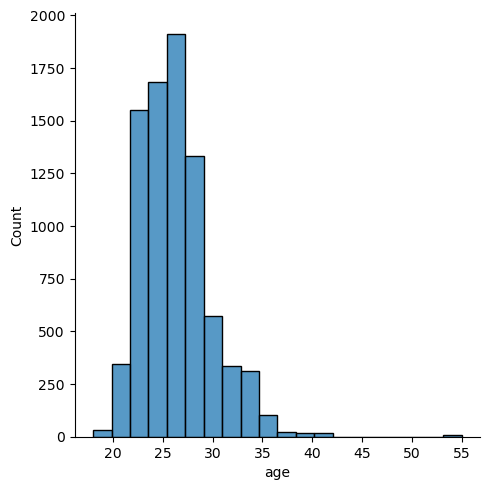

In [6]:
print(df['age'].describe())
print(sns.displot(df['age'],bins=20))

Most participants were around 26 years of age with some extreme values of 18 years old and 55 years old.

## General information on participants

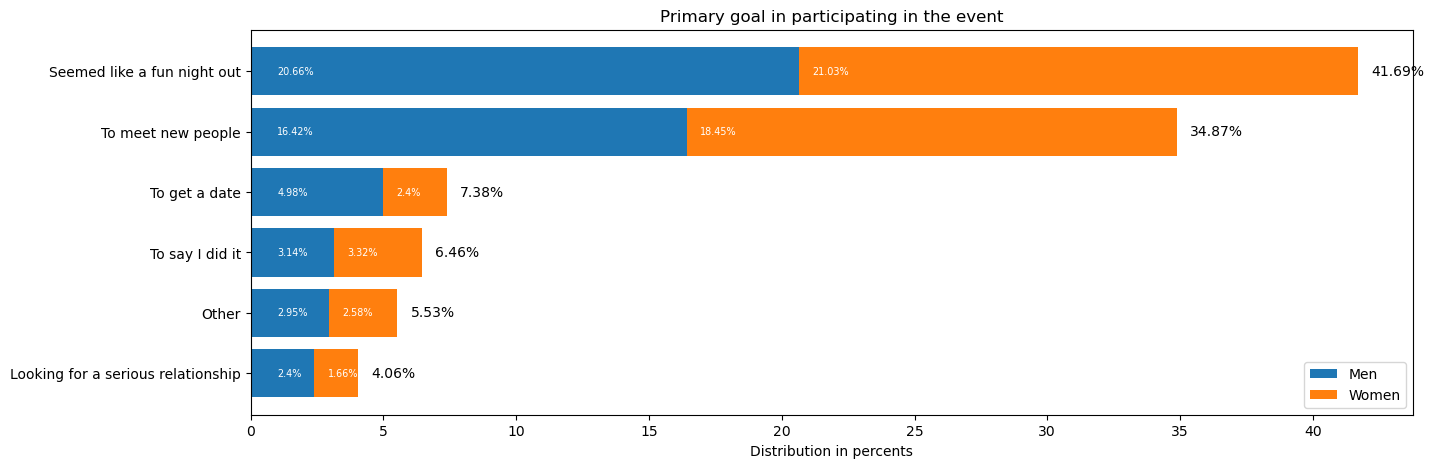

In [7]:
goal_df = df.iloc[:,np.r_[0,2,45]].groupby('iid').mean()

goal_df["goal"] = goal_df["goal"].apply(lambda x : 
                         'Seemed like a fun night out' if x ==1
                         else 'To meet new people' if x == 2
                         else 'To get a date' if x == 3
                         else 'Looking for a serious relationship' if x  == 4
                         else 'To say I did it' if x == 5
                         else 'Other' if x == 6
                         else 'NaN')

goal_df["gender"] = goal_df["gender"].apply(lambda x : 'Man' if x == 1 else 'Woman' if x == 0 else 'NaN')

goal = goal_df.pivot(columns='gender',values='goal')

gvc = goal_df['goal'].value_counts(ascending=True).drop('NaN')
gm = goal['Man'].value_counts().reindex(goal_df["goal"].unique(), fill_value=0).reindex_like(gvc)
gw = goal['Woman'].value_counts().reindex(goal_df["goal"].unique(), fill_value=0).reindex_like(gvc)

dist_men = [np.round((x / np.sum(gvc)) * 100, 2) for x in gm]
dist_women = [np.round((x / np.sum(gvc)) * 100, 2) for x in gw]

dist = [round(a+b,2) for a,b in zip(dist_men,dist_women)]

plt.figure(figsize=(15,5))
plt.title("Primary goal in participating in the event")
plt.barh(gm.index, dist_men, color='#1f77b4')
plt.barh(gw.index, dist_women, left=dist_men, color='#ff7f0e')
plt.xlabel('Distribution in percents')
plt.legend(labels=['Men','Women'], loc='best')



for i in range(len(dist)):
    plt.text(dist[i]+.5, gvc.index[i],f'{dist[i]}%',va='center',fontweight='roman')
    plt.text(1, gvc.index[i],f'{dist_men[i]}%',va='center',fontsize='x-small',color='white')
    plt.text(dist_men[i]+.5, gvc.index[i],f'{dist_women[i]}%',va='center',fontsize='x-small',color='white')



plt.show()

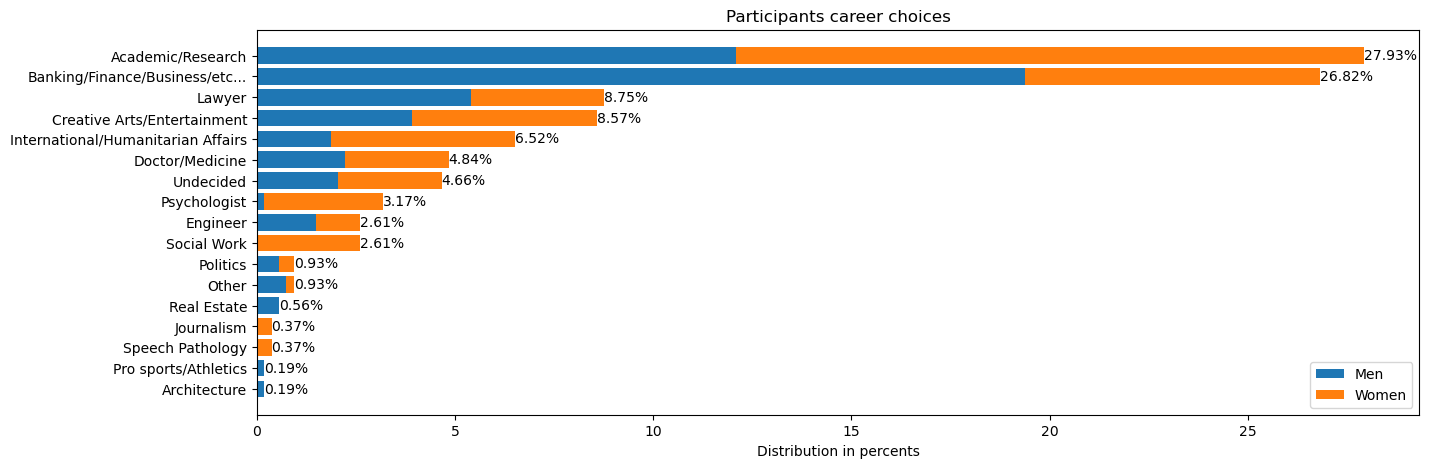

In [8]:
df["career_c"] = pd.to_numeric(df["career_c"])
career_df = df.iloc[:,np.r_[0,2,49]].groupby('iid').mean()
career_df["career_c"] = career_df["career_c"].apply(lambda x : 'Lawyer' if x == 1
                                         else 'Academic/Research' if x == 2
                                         else 'Psychologist' if x == 3
                                         else 'Doctor/Medicine' if x == 4
                                         else 'Engineer' if x == 5
                                         else 'Creative Arts/Entertainment' if x == 6
                                         else 'Banking/Finance/Business/etc...' if x == 7
                                         else 'Real Estate' if x == 8
                                         else 'International/Humanitarian Affairs' if x == 9
                                         else 'Undecided' if x == 10
                                         else 'Social Work' if x == 11
                                         else 'Speech Pathology' if x == 12
                                         else 'Politics' if x == 13
                                         else 'Pro sports/Athletics' if x == 14
                                         else 'Other' if x == 15
                                         else 'Journalism' if x == 16
                                         else 'Architecture' if x == 17
                                         else 'NaN')
career_df["gender"] = career_df["gender"].apply(lambda x : 'Man' if x == 1 else 'Woman' if x == 0 else 'NaN')

career = career_df.pivot(columns='gender',values='career_c')

cvc = career_df['career_c'].value_counts(ascending=True).drop('NaN')
cm = career['Man'].value_counts().reindex(career_df["career_c"].unique(), fill_value=0).reindex_like(cvc)
cw = career['Woman'].value_counts().reindex(career_df["career_c"].unique(), fill_value=0).reindex_like(cvc)

dist_men = [np.round((x / np.sum(cvc)) * 100, 2) for x in cm]
dist_women = [np.round((x / np.sum(cvc)) * 100, 2) for x in cw]

dist = [round(a+b,2) for a,b in zip(dist_men,dist_women)]

plt.figure(figsize=(15,5))
plt.title("Participants career choices")
plt.barh(cm.index, dist_men, color='#1f77b4')
plt.barh(cw.index, dist_women, left=dist_men, color='#ff7f0e')
plt.xlabel('Distribution in percents')
plt.legend(labels=['Men','Women'], loc='best')

for i in range(len(dist)):
    plt.text(dist[i], cvc.index[i],f'{dist[i]}%',va='center')

plt.show()

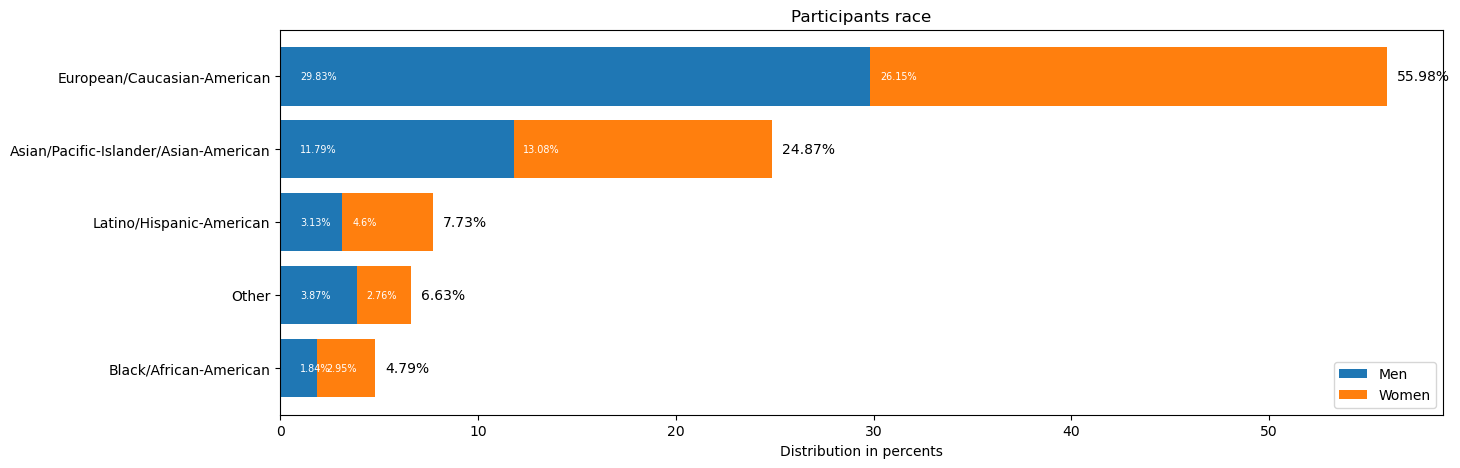

In [9]:
race_df = df.iloc[:,np.r_[0,2,39]].groupby('iid').mean()
race_df["race"] = race_df["race"].apply(lambda x : 'Black/African-American' if x == 1
                                         else 'European/Caucasian-American' if x == 2
                                         else 'Latino/Hispanic-American' if x == 3
                                         else 'Asian/Pacific-Islander/Asian-American' if x == 4
                                         else 'Native American' if x == 5
                                         else 'Other' if x == 6
                                         else 'NaN')

race_df["gender"] = race_df["gender"].apply(lambda x : 'Man' if x == 1 else 'Woman' if x == 0 else 'NaN')

race = race_df.pivot(columns='gender',values='race')

rvc = race_df['race'].value_counts(ascending=True).drop('NaN')
rm = race['Man'].value_counts().reindex(race_df["race"].unique(), fill_value=0).reindex_like(rvc)
rw = race['Woman'].value_counts().reindex(race_df["race"].unique(), fill_value=0).reindex_like(rvc)

dist_men = [np.round((x / np.sum(rvc)) * 100, 2) for x in rm]
dist_women = [np.round((x / np.sum(rvc)) * 100, 2) for x in rw]

dist = [round(a+b,2) for a,b in zip(dist_men,dist_women)]

plt.figure(figsize=(15,5))
plt.title("Participants race")
plt.barh(rm.index, dist_men, color='#1f77b4')
plt.barh(rw.index, dist_women, left=dist_men, color='#ff7f0e')
plt.xlabel('Distribution in percents')
plt.legend(labels=['Men','Women'], loc='best')


for i in range(len(dist)):
    plt.text(dist[i]+.5, rvc.index[i],f'{dist[i]}%',va='center',fontweight='roman')
    plt.text(1, rvc.index[i],f'{dist_men[i]}%',va='center',fontsize='x-small',color='white')
    plt.text(dist_men[i]+.5, rvc.index[i],f'{dist_women[i]}%',va='center',fontsize='x-small',color='white')
    
plt.show()

# What makes people interested in each other
This is the main question we are going to try to answer. 

In the following I will be looking at differents aspects of peoples interests, choices and self image in the dating world.

## What Is the most important attribute for men / women
I selected answers for the question "_We want to know what you look for in the opposite sex_" at signup and followup questionnaires (Times 1, 2 and 3) 

Other variables could have been selected such as the answer to "_We want to know what you think MOST of your fellow men/women look for in the opposite sex_"

But these variables have a lot of missing data, and are a mix of two different scales (1-10 and 100 point allocation)

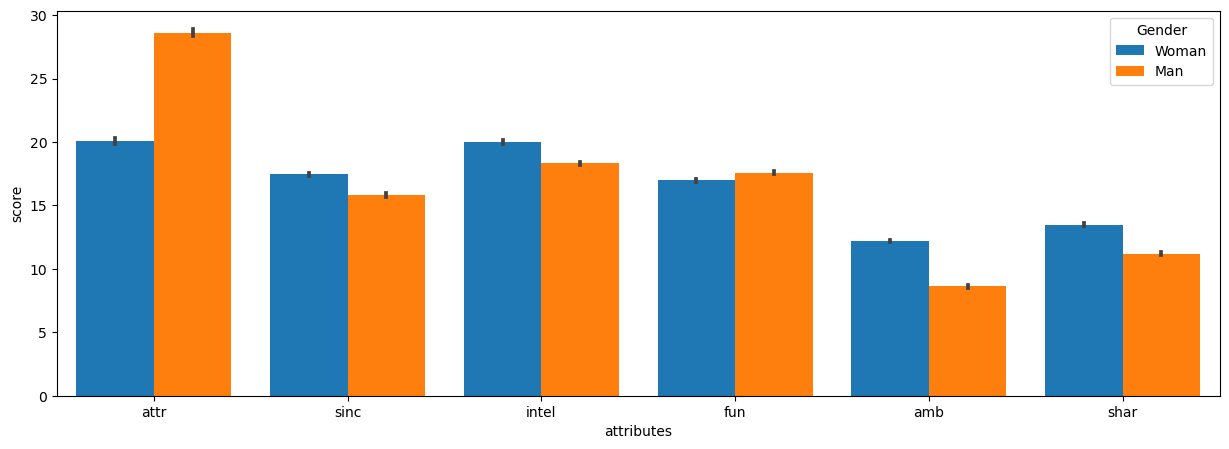

In [10]:
attribute_scores = [col for col in df.columns if 'gender' in col or
                                                 'iid' in col or
                                                 '1_1' in col or
                                                 '1_2' in col or
                                                 '1_3' in col]

attribute_df = df.loc[:,attribute_scores]
attribute_df = attribute_df.set_index('iid')
attribute_df.columns = attribute_df.columns.str[:-3]

attribute_df.groupby(by=attribute_df.columns, axis=1,sort=False).mean().groupby('iid').mean()

attribute_df['gen'] = attribute_df['gen'].apply(lambda x : 'Man' if x == 1 else 'Woman')

attribute_melt = pd.melt(attribute_df, id_vars='gen', var_name="attributes", value_name="score")

fig= plt.subplots(figsize=(15, 5))
sns.barplot(x='attributes', y="score", hue='gen', saturation=1, data = attribute_melt)
plt.legend(title='Gender')

For men the main attribute of interest is attractiveness, followed by intelligence and wheather the person is funny. 
In women however it seems that attractivenes and intelligence are almost tied. 

In both groups the most important features are therefore inteligence and attractiveness

## How does each attribute affect succes in dating ?

In [11]:
success_rate = []
for i in df['iid']: 
    mask = df['iid'] == i
    success_rate.append(df[mask]['dec_o'].sum()/len(df[mask]['dec_o']))

grouped_df = df.iloc[:, np.r_[0,2,24:30]]
grouped_df['success_rate'] = success_rate
grouped_df2 = grouped_df.groupby('iid').mean()
grouped_df2['gender'] = grouped_df2.gender.apply(lambda x : 'Man' if x == 1 else 'Woman' if  x == 0 else 'NaN')
grouped_df2 = grouped_df2.reset_index()

grouped_df2 = (grouped_df2.set_index(['iid','gender','success_rate']).rename_axis(['attributes'], axis=1).stack().reset_index())
grouped_df2.columns = ['iid', 'gender', 'success_rate', 'attributes', 'score']

fig = px.scatter(grouped_df2,x='score',y='success_rate',color='gender',trendline='ols', facet_col = "attributes",
                 color_discrete_sequence=['#1f77b4','#ff7f0e'],facet_col_wrap=3,template='simple_white')

fig.update_xaxes(title='')

fig.update_layout(
        title = go.layout.Title(text = "Success rate in dating vs partners' rating", x = 0.5),
        autosize=False,
        width=1500,
        height=800,
        margin=dict(l=20, r=20, t=50, b=20),
        showlegend=True,
        xaxis3=dict(title="Attribute scores"),
        legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01))
fig.show()

/tmp/ipykernel_788/395105034.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['success_rate'] = success_rate


These figures describe how successful one might be in getting a second date given the partners notation in different attributes.

Since all of the attributes are desirable in a way or another it is coherent that all the trend lines have a positive slope. 

Interestingly, women trand lines tend to be steeper than men's or starting at a higher intercept. 
- A steeper trend line would indicate more marked extremes (i.e. an attracctive woman is going to be very successful in contrast to an unattractive woman).
- A higher intercept however could inidicate that women are in average more succesful in getting a second date than men independently of their score. 

These figures haowever do not take intoaccount possible covariations between attributes.

## Can people accurately predict their own perceived value in the dating market?

In [19]:
df.describe(include='all').iloc[:,np.r_[87:92,98:103]]

,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr,sinc,intel,fun,amb
count,8244.000000,8244.000000,8244.000000,8244.000000,8244.000000,8147.000000,8072.000000,8053.000000,7999.000000,7637.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.083212,8.290757,7.707060,8.405386,7.578603,6.187971,7.171705,7.366571,6.399675,6.778774
std,1.397686,1.407854,1.565333,1.078233,1.781190,1.950344,1.741646,1.551680,1.954990,1.795916
min,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,6.000000,5.000000,6.000000
50%,7.000000,8.000000,8.000000,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,7.000000
75%,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000


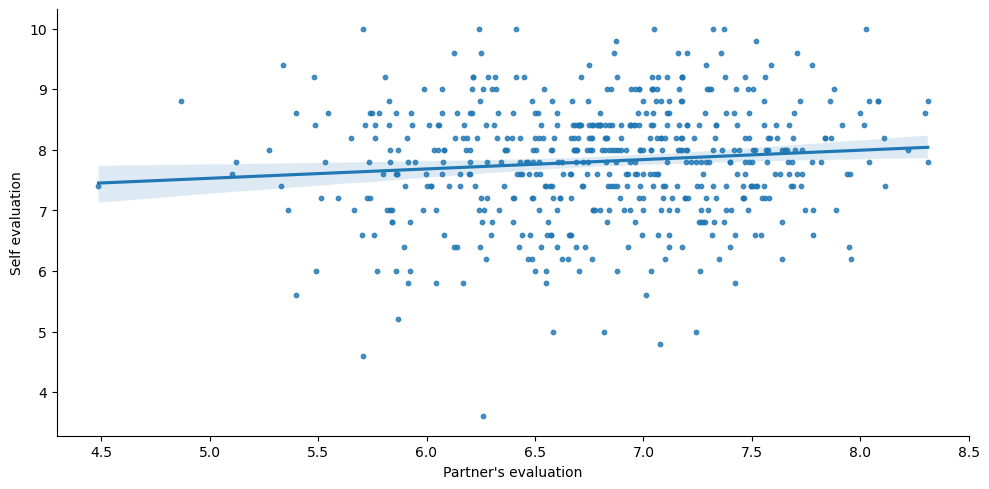

In [20]:
self_eval = df.iloc[:,np.r_[0,87:92]]
partner_eval = df.iloc[:,np.r_[0,24:29]] 

self_eval = self_eval.groupby('iid').mean().reset_index()
partner_eval = partner_eval.groupby('iid').mean().reset_index()


partner_eval = partner_eval.set_index('iid').rename_axis("")
self_eval = self_eval.set_index('iid').rename_axis("")

evals = pd.DataFrame()
evals['partner_eval'] = partner_eval.mean(axis=1)
evals['self_eval'] = self_eval.mean(axis=1)

plot_a = sns.lmplot(x='partner_eval',y='self_eval', data = evals, scatter_kws={"s": 10}, aspect=2)
plot_a.set_xlabels("Partner's evaluation").set_ylabels("Self evaluation")


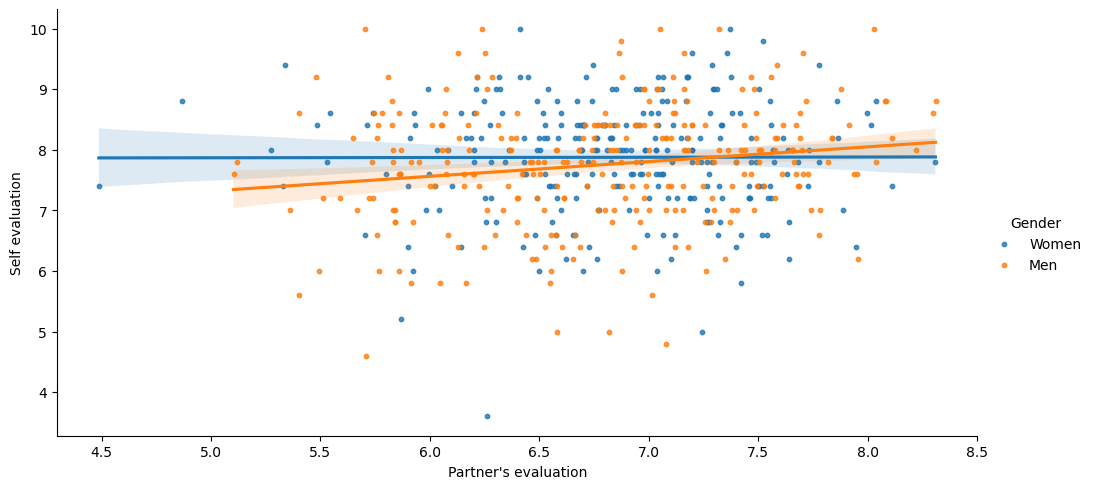

In [21]:
gender = df.iloc[:,np.r_[0,2]]
gender = gender.groupby('iid').mean().reset_index()

evals['Gender'] = gender['gender'].apply(lambda x : 'Men' if x == 1 else 'Women')

plot_a = sns.lmplot(x='partner_eval',y='self_eval', hue='Gender', data = evals, scatter_kws={"s": 10},aspect=2)
plot_a.set_xlabels("Partner's evaluation").set_ylabels("Self evaluation")


Given these figures, although in general people are not great at predicting their own value in the market, men are better at woman in this aspect.